# Project - Forest Fire

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sns

## Read Data

Data source: https://www.fs.usda.gov/rds/archive/catalog/RDS-2013-0009.4

In [42]:
conn = sqlite3.connect("Data/FPA_FOD_20170508.sqlite")
wildfire = pd.read_sql_query ("select * from Fires where FIRE_YEAR>=2010", conn)
wildfire

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1067488,1302561,CDF_2010_56_2229_001566,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,C,36.766944,-121.303056,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xc0\x07\x1bCeS^\xc0...
1,1067489,1302566,CDF_2010_56_2229_001806,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,B,36.776944,-121.311111,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xd0\xb7\x92>\xe9S^\...
2,1067490,1302568,CDF_2010_56_2229_001857,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,A,36.856111,-121.381111,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xe4e\xda\x1fdX^\xc0...
3,1067491,1302570,CDF_2010_56_2229_001897,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,A,36.818056,-121.391111,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00T\xa3\xe4\xf6\x07Y^\...
4,1067492,1302576,CDF_2010_56_2229_002326,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,B,36.883056,-121.561944,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x04\xfe\xcf\xe5\xf6...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450229,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
450230,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
450231,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
450232,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


## Undserstand the Data

In [43]:
wildfire.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [44]:
#set(wildfire['STATE'])

In [45]:
set(wildfire['STAT_CAUSE_DESCR'])

{'Arson',
 'Campfire',
 'Children',
 'Debris Burning',
 'Equipment Use',
 'Fireworks',
 'Lightning',
 'Miscellaneous',
 'Missing/Undefined',
 'Powerline',
 'Railroad',
 'Smoking',
 'Structure'}

In [46]:
len(wildfire)

450234

### Which state has higher number of wildfires?

In [47]:
fire_year = pd.DataFrame(wildfire['FIRE_YEAR'].value_counts()).reset_index()

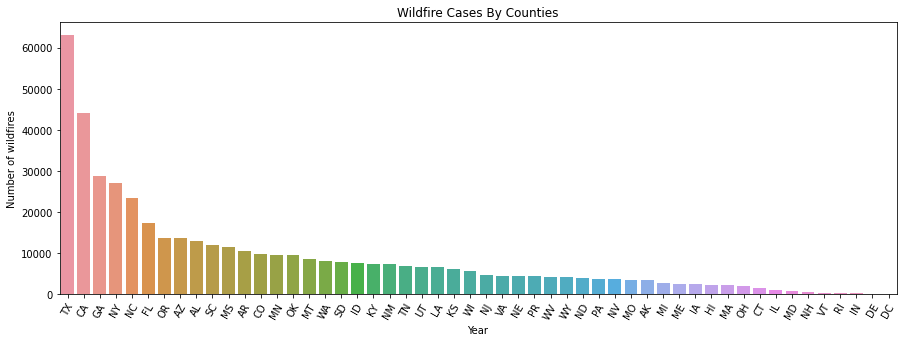

In [48]:
state_wf = wildfire.groupby(['STATE']).size().sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=state_wf.index, y=state_wf.values)
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Number of wildfires')
plt.title('Wildfire Cases By Counties')
plt.show()

### For the state with the most wildfires, what are some common reasons?

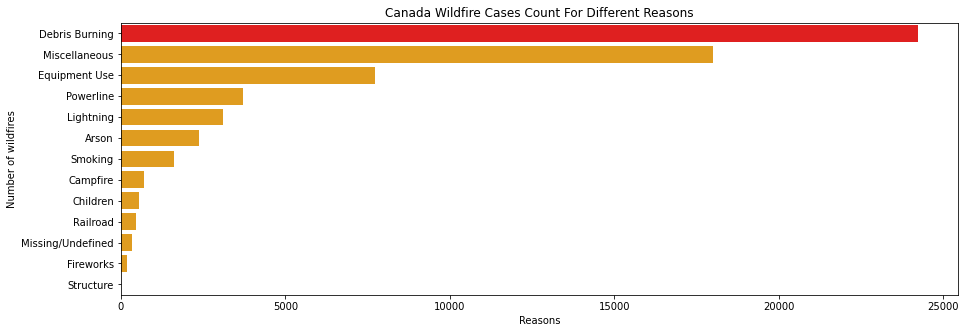

In [50]:
CA_wf = wildfire[wildfire['STATE']=='TX']
df_grouped = CA_wf.groupby(['STAT_CAUSE_DESCR']).size().sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(15,5))
clrs = ['orange' if (x < max(df_grouped.values)) else 'red' for x in df_grouped.values]
sns.barplot(y=df_grouped.index, x=df_grouped.values, orient = 'h', palette=clrs)
plt.xlabel('Reasons')
plt.ylabel('Number of wildfires')
plt.title('Canada Wildfire Cases Count For Different Reasons')
plt.show()

<AxesSubplot:>

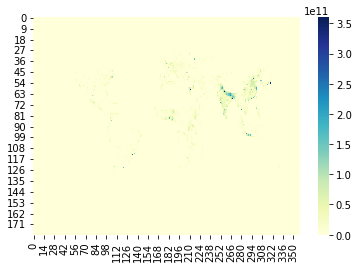

In [17]:
world = pd.read_csv('Data/gpw-v4-population-count-rev11_2020_1_deg_asc/gpw_v4_population_count_rev11_2020_1try.asc', sep=' ', header=None)
world = world*10000
sns.heatmap(world, cmap='YlGnBu')